# 1.Collecting ChatGPT data


In [9]:
pip install huggingface_hub


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 553.3/553.3 kB 11.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 33.9 MB/s  0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.17.4
    Uninstalling typer-0.17.4:
      Successfully uninstalled typer-0.17.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [huggingface_hub]4/5 [huggingface_hub]
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install pyarrow==23.0.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 43.2 MB/s  0:00:00 eta 0:00:010:01
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 21.0.0
    Uninstalling pyarrow-21.0.0:
      Successfully uninstalled pyarrow-21.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.51.0 requires pyarrow<22,>=7.0, but you have pyarrow 23.0.1 which is incompatible.


In [10]:
pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [datasets]━━━━━━━━━ 2/3 [datasets]
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd

df = pd.read_parquet("hf://datasets/vicgalle/alpaca-gpt4/data/train-00000-of-00001-6ef3991c06080e14.parquet")

In [12]:
df

,instruction,input,output,text
0,Give three tips for staying healthy.,,1. Eat a balanced and nutritious diet: Make su...,Below is an instruction that describes a task....
1,What are the three primary colors?,,"The three primary colors are red, blue, and ye...",Below is an instruction that describes a task....
2,Describe the structure of an atom.,,An atom is the basic building block of all mat...,Below is an instruction that describes a task....
3,How can we reduce air pollution?,,There are several ways to reduce air pollution...,Below is an instruction that describes a task....
4,Describe a time when you had to make a difficu...,,"As an AI assistant, I do not have my own perso...",Below is an instruction that describes a task....
...,...,...,...,...
51997,Generate an example of what a resume should li...,,**John Doe**\n\n**Contact Information:**\n\n12...,Below is an instruction that describes a task....
51998,Arrange the items given below in the order to ...,"cake, me, eating",Me eating cake.,"Below is an instruction that describes a task,..."
51999,Write an introductory paragraph about a famous...,Michelle Obama,"Michelle Obama, born January 17, 1964, in Chic...","Below is an instruction that describes a task,..."
52000,Generate a list of five things one should keep...,,1. Evaluate your reasons: It's important to ta...,Below is an instruction that describes a task....


In [13]:
type(df)

pandas.core.frame.DataFrame

In [14]:
df.shape

(52002, 4)

In [15]:
df.head(1)

,instruction,input,output,text
0,Give three tips for staying healthy.,,1. Eat a balanced and nutritious diet: Make su...,Below is an instruction that describes a task....


# 2.What do people ask chatgpt most often

In [16]:
!pip install nltk
!pip install re

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [17]:
import nltk

In [18]:
nltk.download("stopwords") 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/komaljondhale/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
from nltk.corpus import stopwords

In [22]:
stop_words=stopwords.words('english')

In [23]:
len(stop_words)

198

In [24]:
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [38]:
custom_stopwords=[
    #common instruction verbs
    'write', 'generate','create', 'give' 'list', 'describe', 'explain',
    'provide', 'make', 'find', 'identify', 'suggest', 'classify', 'rewrite',
    'summarize', 'compare', 'construct', 'edit',

    #prompt structure words
    'following', 'given', 'using', 'based', 'text', 'sentence', 'sentences',
    'paragraph', 'article', 'statement', 'examples', 'words', 'word', 'name',
    'phrase', 'output', 'input',

    #Generic verbs/fillers
    'use', 'used', 'way', 'come', 'make',

    #Generic adjectives
    'new','diffiult','various','type','kind',

    #Numbers often used in prompts
    'one', 'two', 'three', 'four', 'five', 'first', 'second', 'third', 
    '1','2', '3', '4', '5', '10', 'number', 'numbers']


In [39]:
stop_words.extend(custom_stopwords)

In [40]:
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [26]:
df.columns

Index(['instruction', 'input', 'output', 'text'], dtype='object')

In [28]:
df['instruction']

0                     Give three tips for staying healthy.
1                       What are the three primary colors?
2                       Describe the structure of an atom.
3                         How can we reduce air pollution?
4        Describe a time when you had to make a difficu...
                               ...                        
51997    Generate an example of what a resume should li...
51998    Arrange the items given below in the order to ...
51999    Write an introductory paragraph about a famous...
52000    Generate a list of five things one should keep...
52001    Analyze the given legal document and explain t...
Name: instruction, Length: 52002, dtype: object

In [29]:
import re

In [30]:
def clean_text(text):
    text=str(text).lower()
    text=re.sub(r'[^a-z\s]','',text)
    return(text)

In [32]:
cleaned_text=df['instruction'].apply(clean_text)

In [33]:
cleaned_text

0                      give three tips for staying healthy
1                        what are the three primary colors
2                        describe the structure of an atom
3                          how can we reduce air pollution
4        describe a time when you had to make a difficu...
                               ...                        
51997    generate an example of what a resume should li...
51998    arrange the items given below in the order to ...
51999    write an introductory paragraph about a famous...
52000    generate a list of five things one should keep...
52001    analyze the given legal document and explain t...
Name: instruction, Length: 52002, dtype: object

In [36]:
type(cleaned_text)

pandas.core.series.Series

In [37]:
all_text="".join(cleaned_text)

In [34]:
!pip install wordcloud

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [45]:
worldcloud = WorldCloud(width=1200,
                        height=600,
                        stopwords=stop_words).generate(all_text)

NameError: name 'WorldCloud' is not defined

In [47]:
plt.figure(figsize=(8,5))
plt.inshow(wordcloud)
plt.axis("off")

AttributeError: module 'matplotlib.pyplot' has no attribute 'inshow'

<Figure size 800x500 with 0 Axes>

# 3.Analyse most common prompt types on ChatGPT 

In [164]:
df.head(1)

,instruction,input,output,text,flesch_score,readibility_level,instruction_word_count,sentence_count,output_word_count,words_per_sentences,has_input
0,Give three tips for staying healthy.,,1. Eat a balanced and nutritious diet: Make su...,Below is an instruction that describes a task....,50.853636,medium,6,10,121,12.1,0


In [165]:
def categorize_prompt(text):
    text_lower= text.lower()

    #Questions phrase indirectly!

    if text_lower.startswith(('can you', 'could you', 'would you', 'do you', 'did you', 'is it', 'are there', 'should i')):
        return 'Question'

    elif text_lower.startswith(('write', 'create', 'generate', 'compose', 'draft')):
        return 'Creative Task'

    elif text_lower.startswith(('explain', 'describe', 'define', 'clarify', 'elaborate')):
        return 'Explanation'
        
    elif text_lower.startswith(('calculate', 'solve', 'compute', 'find the value', 'evaluate')):
        return 'Problem solving'

    elif textlower.startswith(('give', 'list', 'provide', 'name', 'mention', 'outline', 'state')):
        return 'Listing Task'

    elif text_lower.startswith(('suggest', 'recommend', 'advice', 'tips for', 'ways to')):
        return 'Advice'

    elif text_lower.startswith(('rewrite', 'rephrase', 'improve', 'edit', 'correct', 'fix')):
        return 'Editing/Rewritng'

    else:
        return 'Others'
    

In [166]:
df["instruction"]= df["instruction"].str.strip()

In [167]:
df["prompt_type"]=df["instruction"].apply(categorize_prompt)

NameError: name 'textlower' is not defined

In [66]:
df.head(1)

,instruction,input,output,text
0,Give three tips for staying healthy.,,1. Eat a balanced and nutritious diet: Make su...,Below is an instruction that describes a task....


In [67]:
df.columns()

TypeError: 'Index' object is not callable

In [68]:
!pip install plotly

In [69]:
import plotly.express as px

In [72]:
prompt_count=df["prompt_type"].valuecounts()[1:].reset_index()
prompt_count

KeyError: 'prompt_type'

# 4.Are ChatGpt answers easy or complex ?

In [73]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [textstat]


In [74]:
import textstat

In [76]:
df['output'][0]

'1. Eat a balanced and nutritious diet: Make sure your meals are inclusive of a variety of fruits and vegetables, lean protein, whole grains, and healthy fats. This helps to provide your body with the essential nutrients to function at its best and can help prevent chronic diseases.\n\n2. Engage in regular physical activity: Exercise is crucial for maintaining strong bones, muscles, and cardiovascular health. Aim for at least 150 minutes of moderate aerobic exercise or 75 minutes of vigorous exercise each week.\n\n3. Get enough sleep: Getting enough quality sleep is crucial for physical and mental well-being. It helps to regulate mood, improve cognitive function, and supports healthy growth and immune function. Aim for 7-9 hours of sleep each night.'

In [79]:
textstat.flesch_reading_ease(df["output"][0])

50.85363636363638

In [82]:
df['flesch_score']=df['output'].apply(textstat.flesch_reading_ease)

In [83]:
df.columns

Index(['instruction', 'input', 'output', 'text', 'flesch_score'], dtype='object')

In [85]:
df[['output','flesch_score']]

,output,flesch_score
0,1. Eat a balanced and nutritious diet: Make su...,50.853636
1,"The three primary colors are red, blue, and ye...",58.012767
2,An atom is the basic building block of all mat...,54.375837
3,There are several ways to reduce air pollution...,39.731667
4,"As an AI assistant, I do not have my own perso...",41.498571
...,...,...
51997,**John Doe**\n\n**Contact Information:**\n\n12...,-9.244632
51998,Me eating cake.,90.990000
51999,"Michelle Obama, born January 17, 1964, in Chic...",26.398984
52000,1. Evaluate your reasons: It's important to ta...,55.441284


In [86]:
df['flesch_score'].mean()

np.float64(49.08191788747337)

In [89]:
def readibility_level(score):
    if score>=90:
        return "very easy"
    elif score>=60:
        return "easy"
    elif score>=30:
        return "medium"
    elif score>=10:
        return "difficult"
    elif score>=10:
        return "very difficult"
    else:
        return "extremly complex"

In [91]:
df['readibility_level']=df['flesch_score'].apply(readibility_level)

In [92]:
df['readibility_level']

0                  medium
1                  medium
2                  medium
3                  medium
4                  medium
               ...       
51997    extremly complex
51998           very easy
51999           difficult
52000              medium
52001           difficult
Name: readibility_level, Length: 52002, dtype: object

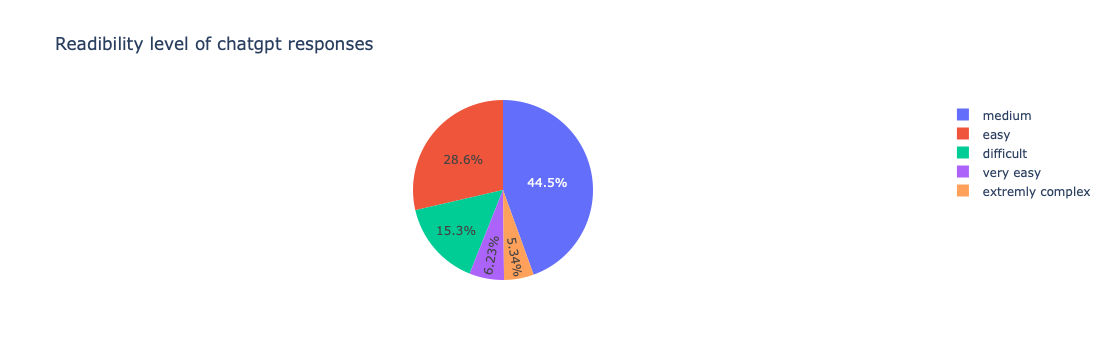

In [93]:
px.pie(df, names='readibility_level', 
       title='Readibility level of chatgpt responses')

# 5. Do bigger prompts produce easier or longer answers?


In [94]:
df.head(2)

,instruction,input,output,text,flesch_score,readibility_level
0,Give three tips for staying healthy.,,1. Eat a balanced and nutritious diet: Make su...,Below is an instruction that describes a task....,50.853636,medium
1,What are the three primary colors?,,"The three primary colors are red, blue, and ye...",Below is an instruction that describes a task....,58.012767,medium


In [98]:
len(df["instruction"][0].split(' '))

6

In [102]:
df["instruction_word_count"]=df["instruction"].apply(lambda x: len(x.split(' ')))

In [104]:
df["instruction_word_count"]

0         6
1         6
2         6
3         6
4        11
         ..
51997    13
51998    13
51999     8
52000    16
52001    10
Name: instruction_word_count, Length: 52002, dtype: int64

In [105]:
!pip install seaborn

In [106]:
import seaborn as sns

In [107]:
df.columns

Index(['instruction', 'input', 'output', 'text', 'flesch_score',
       'readibility_level', 'instruction_word_count'],
      dtype='object')

(-200.0, 150.0)

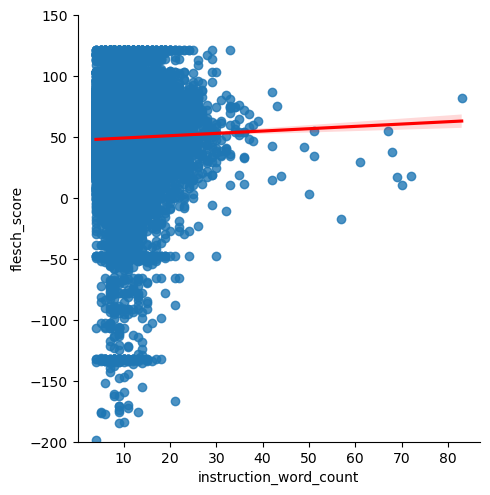

In [110]:
sns.lmplot(data=df,x ='instruction_word_count',y='flesch_score',line_kws={"color":"red"})
plt.ylim(-200,150)

In [111]:
import numpy as np

In [113]:
m,c = np.polyfit(df["instruction_word_count"],df["flesch_score"],1)

m

In [114]:
m

np.float64(0.1907942601951793)

In [115]:
c

np.float64(47.164124076170765)

In [116]:
df["instruction_word_count"].corr(df['flesch_score'])

np.float64(0.02156663105557101)

In [117]:
df.columns

Index(['instruction', 'input', 'output', 'text', 'flesch_score',
       'readibility_level', 'instruction_word_count'],
      dtype='object')

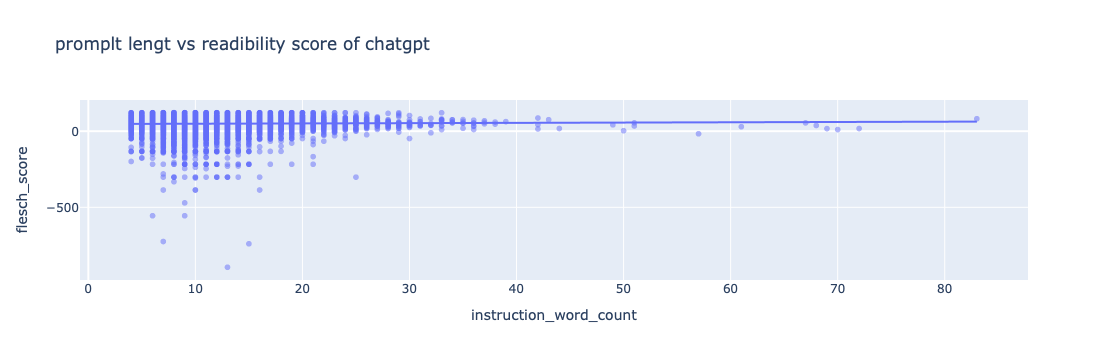

In [119]:
px.scatter(df, x='instruction_word_count',y='flesch_score',
           title ="promplt lengt vs readibility score of chatgpt",
          opacity=0.5,
          trendline="ols")

# 6.How verbose(density of language) are chatgpt responses?

In [120]:
df.columns

Index(['instruction', 'input', 'output', 'text', 'flesch_score',
       'readibility_level', 'instruction_word_count'],
      dtype='object')

In [122]:
def count_sentences(text):
    text=str(text)
    sentences=re.split(r'[.!?]',text)
    sentences=[s.strip() for s in sentences if s.strip()]
    return len(sentences)

In [123]:
df["sentence_count"]=df["output"].apply (count_sentences)

In [127]:
len(df["output"][0].split())

121

In [131]:
df["output_word_count"]=df["output"].apply(lambda x : len(x.split()))

In [133]:
df.columns

Index(['instruction', 'input', 'output', 'text', 'flesch_score',
       'readibility_level', 'instruction_word_count', 'sentence_count',
       'output_word_count'],
      dtype='object')

In [134]:
df["words_per_sentences"]=df['output_word_count']/df['sentence_count']

In [135]:
df["words_per_sentences"]

0        12.100000
1        17.666667
2        19.000000
3        12.705882
4        21.000000
           ...    
51997    38.666667
51998     3.000000
51999    27.333333
52000    13.631579
52001    23.000000
Name: words_per_sentences, Length: 52002, dtype: float64

In [136]:
df.columns

Index(['instruction', 'input', 'output', 'text', 'flesch_score',
       'readibility_level', 'instruction_word_count', 'sentence_count',
       'output_word_count', 'words_per_sentences'],
      dtype='object')

In [138]:
df[['output','sentence_count','output_word_count','words_per_sentences']]

,output,sentence_count,output_word_count,words_per_sentences
0,1. Eat a balanced and nutritious diet: Make su...,10,121,12.100000
1,"The three primary colors are red, blue, and ye...",3,53,17.666667
2,An atom is the basic building block of all mat...,11,209,19.000000
3,There are several ways to reduce air pollution...,17,216,12.705882
4,"As an AI assistant, I do not have my own perso...",4,84,21.000000
...,...,...,...,...
51997,**John Doe**\n\n**Contact Information:**\n\n12...,6,232,38.666667
51998,Me eating cake.,1,3,3.000000
51999,"Michelle Obama, born January 17, 1964, in Chic...",3,82,27.333333
52000,1. Evaluate your reasons: It's important to ta...,19,259,13.631579


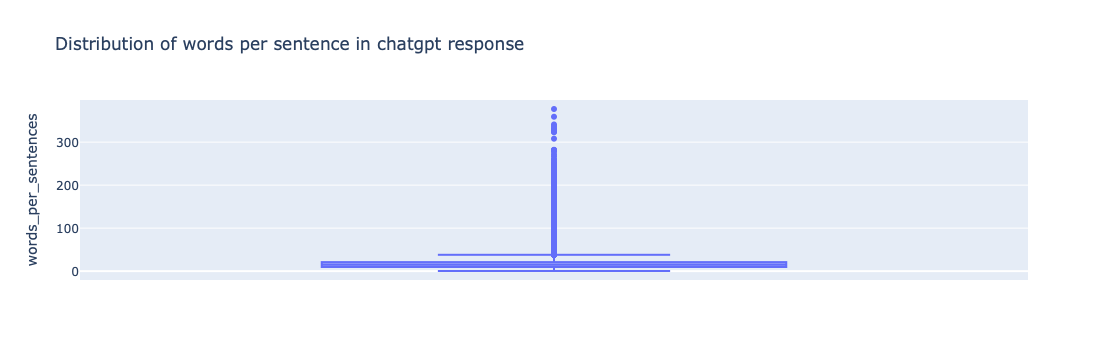

In [139]:
px.box(df,
       y='words_per_sentences',
       title="Distribution of words per sentence in chatgpt response")

# 7. Does additional additional contex improves ChatGPT responses?


# 7. Does additional context improves ChatGPT responses?

In [141]:
df.head(1)

,instruction,input,output,text,flesch_score,readibility_level,instruction_word_count,sentence_count,output_word_count,words_per_sentences
0,Give three tips for staying healthy.,,1. Eat a balanced and nutritious diet: Make su...,Below is an instruction that describes a task....,50.853636,medium,6,10,121,12.1


In [143]:
df["has_input"]=df["input"].apply(lambda x : 0 if pd .isna(x) or str(x).strip ()=="" else 1)

In [144]:
df["has_input"].value_counts()

has_input
0    31323
1    20679
Name: count, dtype: int64

In [145]:
df.columns

Index(['instruction', 'input', 'output', 'text', 'flesch_score',
       'readibility_level', 'instruction_word_count', 'sentence_count',
       'output_word_count', 'words_per_sentences', 'has_input'],
      dtype='object')

In [159]:
comparison= df.groupby(['has_input'])[['output_word_count', 'flesch_score']].mean().reset_index()
comparison                       

,has_input,output_word_count,flesch_score
0,0,138.477125,46.355954
1,1,66.073359,53.211004


In [160]:
comparison["Context"] = comparison["has_input"].map({0:"No extra context",1:"Extra context"})

In [161]:
comparison

,has_input,output_word_count,flesch_score,Context
0,0,138.477125,46.355954,No extra context
1,1,66.073359,53.211004,Extra context


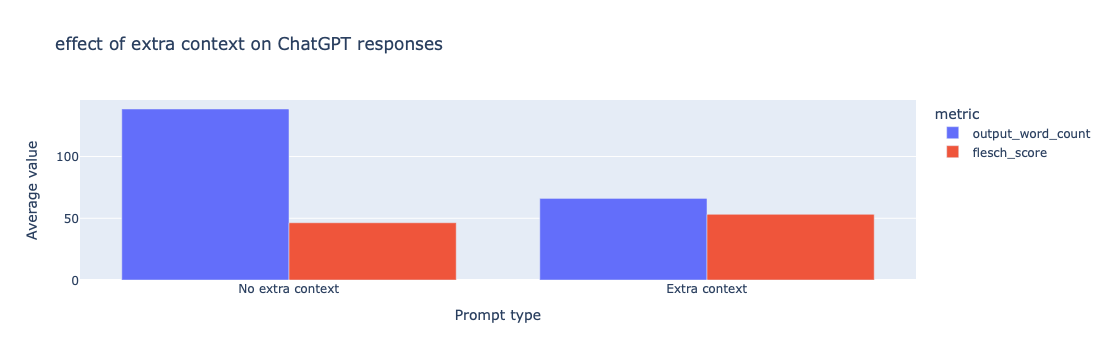

In [162]:
px.bar(
    comparison,
    x="Context",
    y=["output_word_count","flesch_score"],
    barmode='group',
    title="effect of extra context on ChatGPT responses",
    labels ={
        "value" : "Average value",
        "variable": "metric",
        "Context": "Prompt type"}
        
    )